![](https://www.tacc.utexas.edu/documents/1084364/1223323/DesignSafe_Horizontal.jpg)

# Introduction to DesignSafe Image Classification Demo

Throughout the AI for CI machine learning course, we will be using data from [Design Safe](https://www.designsafe-ci.org/) to demo the tools learned throughout each lecture and focus on applications of machine learning to images.  

"DesignSafe is a comprehensive cyberinfrastructure that is part of the NSF-funded Natural Hazard Engineering Research Infrastructure (NHERI) and provides cloud-based tools to manage, analyze, understand, and publish critical data for research to understand the impacts of natural hazards." -- [About Design Safe](https://www.designsafe-ci.org/about/designsafe/) 

We will use a DesignSafe dataset from Hurricane Harvey, a category 4 hurricane that hit Texas in August of 2017 and resulted in catastrophic flooding to the Houston metropolitan area.  The data set is specifically focused on image classification of homes according to the amount of damage the home received. All images of homes are labeled as C0, C2, or C4 respectively for low, medium or high damage.  

## Overview 

The series of demos will be using this data to showcase practical applications of the tools introduced: 

- DEMO 1: Image processing and exploratory data analysis
- DEMO 2: Supervised learning techniques for image classication
- DEMO 3: Unsupervised learning techniques for image compression 
- DEMO 4: Deep Learning

## Images 

This notebook showcases image processing techniques. In addition to using the tools introduced in lecture (python, numpy matplotlib..) we will also use a python library called [scikit image](https://scikit-image.org/docs/stable/api/skimage.html) used for image processing.

Our data in this demo are images.  Images are typically the data type uint8 which means integers between 0 to 255.  If the image is grayscale the image will be a 2D array with each number representing each pixel.  If the image is colored it will be a 3D array with the additional dimension describing how much red, blue, and green is in each pixel (see image below). 

![](https://4.bp.blogspot.com/-nwJIv0GlYTk/Tbrrt0Iz2VI/AAAAAAAAAGA/mIOwM1TeqLE/w1200-h630-p-k-no-nu/GRAPHICAL+PRESENTATION+OF+RGB+3D+MATRIX.png)

Let's get started by importing some of the python libraries we will need in this notebook.

In [1]:
import os 
import skimage
from skimage.io import imread, ImageCollection
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

# Modifying One Image 

In this notebook we will introduce concepts related to image processing, a process used to modifyies images for preparation for machine learning.  In addition to using the tools introduced in lecture (python, numpy matplotlib..) we will also use a python library called [scikit image](https://scikit-image.org/docs/stable/api/skimage.html) used for image processing. Below we highlight a few functions we will use throughout each notebook. 

## Read one image with skimage

With `scikit image` we can read in one image with the the function `imread`.  Below we import three images from each class in the DesignSafe dataset.    

In [2]:
img1 = imread('reduced_image_data/Validation/C0/00972fe0-04d9-48bd-9daa-afd99680116c.jpg')
img2 = imread('reduced_image_data/Validation/C2/00b919db-247e-4467-95f9-480a2ab61f9f.jpg') 
img3 = imread('reduced_image_data/Validation/C4/0e02d300-9f8c-459f-bae4-688959957522.jpg') 

## Inspect Image

Next, we inspect the image.  As you can see below, our image data is stored as a numpy array and has the expected data type.  

In [3]:
type(img1) # check the data type

numpy.ndarray

In [4]:
img1.dtype,img2.dtype,img3.dtype # check the data type of the numpy array

(dtype('uint8'), dtype('uint8'), dtype('uint8'))

In [5]:
img1.shape,img2.shape,img3.shape # check shapes of images

((4000, 6000, 3), (4000, 6000, 3), (608, 1080, 3))

**Note:** the image shapes above are not the same. 

In [6]:
img1  

array([[[ 30,  40,  16],
        [ 26,  36,  12],
        [ 23,  33,   9],
        ...,
        [167, 169, 194],
        [158, 159, 180],
        [154, 152, 174]],

       [[ 28,  37,  16],
        [ 26,  35,  14],
        [ 25,  34,  13],
        ...,
        [166, 166, 190],
        [158, 156, 178],
        [153, 150, 171]],

       [[ 24,  36,  16],
        [ 24,  36,  16],
        [ 26,  35,  16],
        ...,
        [165, 163, 185],
        [157, 155, 176],
        [152, 149, 168]],

       ...,

       [[ 10,  11,   6],
        [ 12,  13,   8],
        [ 12,  12,  10],
        ...,
        [ 26,  19,  11],
        [ 26,  19,  11],
        [ 26,  19,  11]],

       [[ 11,  12,   7],
        [ 12,  13,   8],
        [ 13,  12,   8],
        ...,
        [ 25,  18,  10],
        [ 26,  19,  13],
        [ 26,  19,  13]],

       [[ 12,  11,   7],
        [ 13,  12,   8],
        [ 13,  12,   8],
        ...,
        [ 25,  18,  12],
        [ 26,  17,  12],
        [ 27,  18,  13]]

In [7]:
img1.max(),img1.min()  # inspect min and max pixel values

(255, 0)

A few things to note is that our data is stored as numpy arrays and the shape of our images is not consistent between images.  We will need reshape to have images be consistent sizes. 

## Plot Image

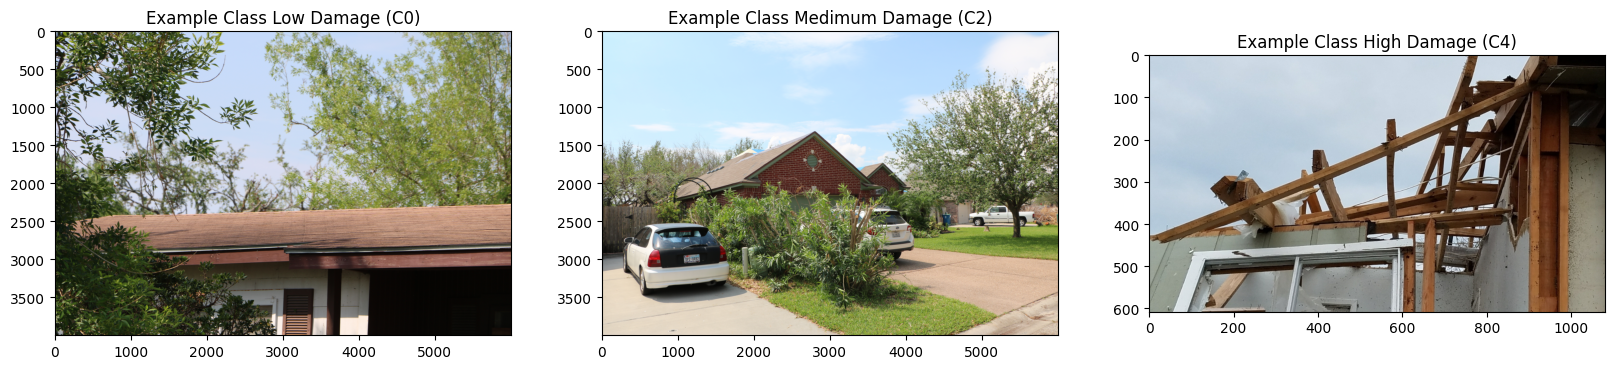

In [8]:
# plot first images imported 
fig,axs = plt.subplots(1,3,figsize=(20,6))
axs[0].imshow(img1)
axs[1].imshow(img2)
axs[2].imshow(img3)
axs[0].set_title('Example Class Low Damage (C0)')
axs[1].set_title('Example Class Medimum Damage (C2)')
axs[2].set_title('Example Class High Damage (C4)');

## Resize single image

In order to deal with images being sized differently and to lower the dimensionality of our dataset, we can resize an image.  Below we specify that we would like the new image to be 112 x 112 pixels.  You can read about how this is done in the [documentation](https://scikit-image.org/docs/stable/api/skimage.transform.html?highlight=resize#skimage.transform.resize).

In [9]:
from skimage.transform import resize

image_resized = resize(img1, (112,112), anti_aliasing=True)

In [10]:
image_resized.dtype

dtype('float64')

In [11]:
image_resized.min(), image_resized.max()  

(0.00945524896881786, 0.9919151936625764)

Note that the resize function changes the data type and standardizes the pixels to values between 0 and 1.  

In [12]:
image_resized.shape

(112, 112, 3)

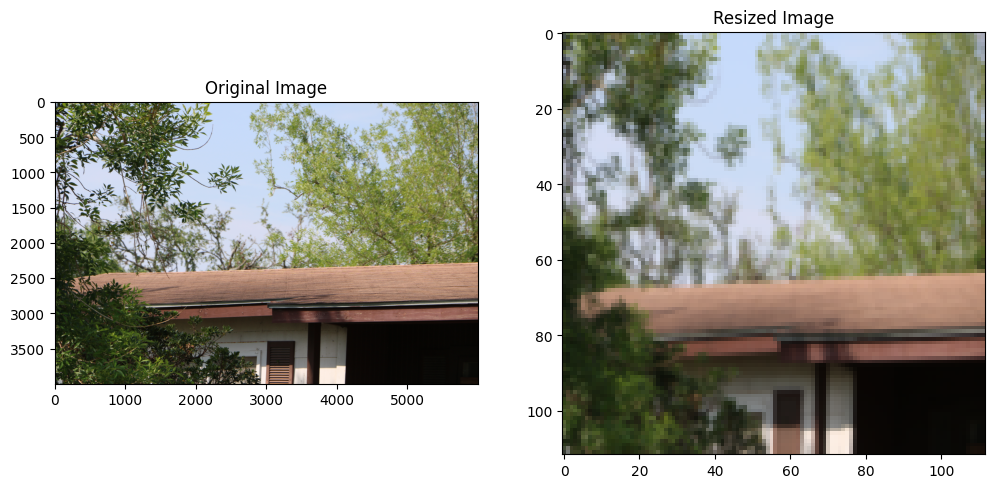

In [13]:
fig,axs = plt.subplots(1,2,figsize=(12,6))
axs[0].imshow(img1)
axs[1].imshow(image_resized)
axs[0].set_title('Original Image')
axs[1].set_title('Resized Image');

## Grayscale single image

`scikit-image` also has tools to convert [RGB images into gray scale](https://scikit-image.org/docs/stable/auto_examples/color_exposure/plot_rgb_to_gray.html?highlight=grayscale).  This can be another helpful way to reduce the number of features need to represent image data, particularly if the color of pixels is not helpful in your model. 

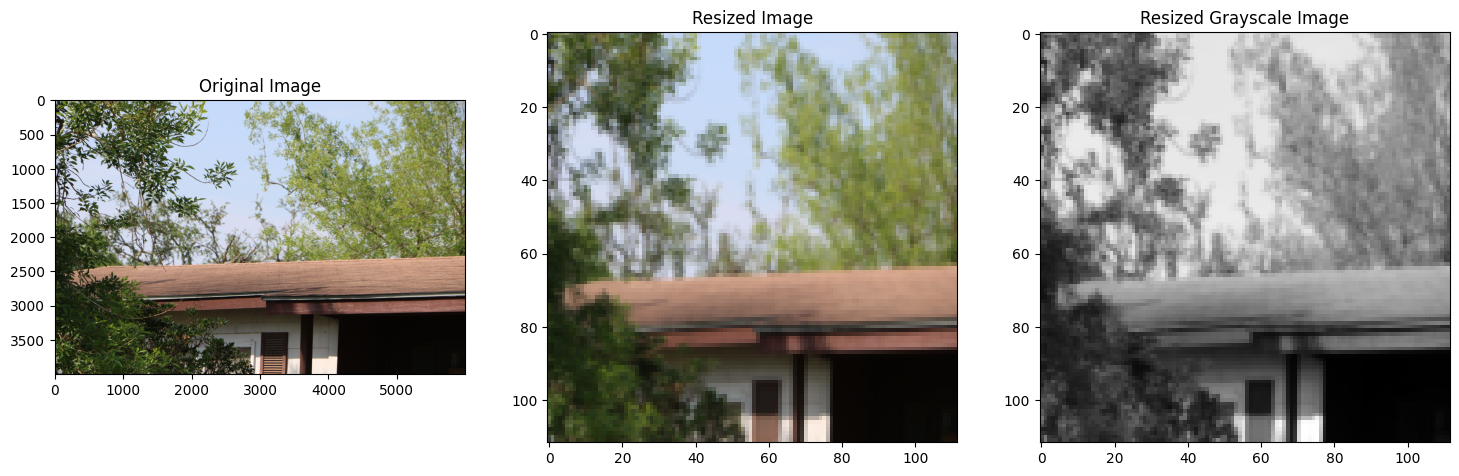

In [14]:
from skimage.color import rgb2gray

image_resized_grayscale = rgb2gray(image_resized)

fig,axs= plt.subplots(1,3,figsize=(18,6))
axs[0].imshow(img1)
axs[1].imshow(image_resized)
axs[2].imshow(image_resized_grayscale,cmap='gray')
axs[0].set_title('Original Image')
axs[1].set_title('Resized Image')
axs[2].set_title('Resized Grayscale Image');

# Multiple Images 

## Check Class Balance

Before we import all images, its good to know how many images are in our dataset.  

In [15]:
# path to data
path_train = 'reduced_image_data/Train/C{}/'
path_test = 'reduced_image_data/Validation/C{}/'

In [16]:
### get number of images per classes in test and train
classes = np.array([0,2,4])
num_train = [len(os.listdir(path_train.format(i))) for i in classes]
num_test = [len(os.listdir(path_test.format(i))) for i in classes]

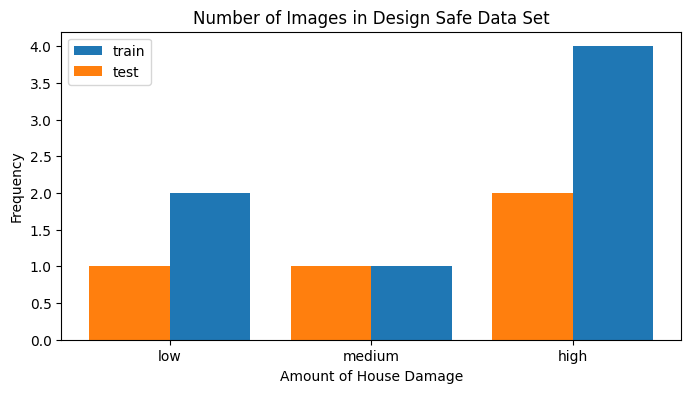

In [17]:
## plot results 
fig,ax = plt.subplots(figsize=(8,4))
ax.bar(classes+0.4,num_train,label='train')
ax.bar(classes-0.4,num_test,label='test')
ax.set_xticks(classes)
ax.set_xticklabels(['low','medium','high'])
ax.set_xlabel('Amount of House Damage')
ax.set_ylabel('Frequency')
ax.legend()
ax.set_title('Number of Images in Design Safe Data Set');

## Using Dask to Import All Images 

Finally we will write a script to import the entire design safe dataset.  We will utilize Dask, specifically the delayed and array collections, to parallelize this task.

In [18]:
# import modules 
from dask.distributed import Client
from dask import delayed
import dask.array as da

In [19]:
# specify the scheduler 
client = Client()

In [20]:
# Functions for reading in and modifying image data 

def read_resize(path, size=(224,224)):
    '''
    INPUT:
    path - string with path to image  
    size - tuple wiht height and width of specified image
    
    RETURN:
    numpy array of color image at path specified size
    '''
    return resize(imread(path),size,anti_aliasing=True)

def read_resize_gray(path, size):
    '''
    INPUT:
    path - string with path to image  
    size - tuple wiht height and width of specified image
    
    RETURN:
    numpy array of gray scaled image at path specified size
    '''
    return rgb2gray(resize(imread(path), size),anti_aliasing=True)

def get_data(path, size=(224,224), gray=False):
    '''
    INPUT:
    path - path to images  
    size - tuple wiht height and width of specified image
    gray - if True, image is grayscaled
    
    RETURN:
    list of dasked delayed objects
    '''
    if gray:
        data = [delayed(read_resize_gray)(path+file,size) for file in os.listdir(path)]
        data = [da.from_delayed(x, shape=size,dtype=np.float32) for x in data]
    else:
        data = [ delayed(read_resize)(path+file,size) for file in os.listdir(path)]
        size = list(size)
        size.append(3)
        size = tuple(size)
        data = [da.from_delayed(x, shape=size,dtype=np.float32) for x in data]
    return data 

def get_all_data(path_list_train, path_list_test, classes, size=(224,224),gray=False):
    '''
    INPUT:
    path_list_train - list of paths to images for training data
    path_list_test - list of paths to images for testing data 
    size - tuple with height and width of specified image
    gray - if True, image is grayscaled
    
    RETURN:
    stack of dask arrays for training and testing data, list of labels for training and testing data
    '''

    X_train,X_test,y_train,y_test =  [],[],[],[]
    for path,class_ in zip(path_list_train,classes):
        print(path)
        data = get_data(path,size=size,gray=gray)
        X_train += data
        y_train += len(data)*[class_]
    for path,class_ in zip(path_list_test,classes):
        print(path)
        data = get_data(path,size=size,gray=gray)
        X_test += data
        y_test += len(data)*[class_]
    return da.stack(X_train), da.stack(X_test), y_train, y_test

In [21]:
classes = [0,2,4]

path_list_train = [path_train.format(class_) for class_ in classes]
path_list_test = [path_test.format(class_) for class_ in classes]
        
train, test, y_train, y_test = get_all_data(path_list_train, path_list_test, classes, size=(224,224),gray=False)

reduced_image_data/Train/C0/
reduced_image_data/Train/C2/
reduced_image_data/Train/C4/
reduced_image_data/Validation/C0/
reduced_image_data/Validation/C2/
reduced_image_data/Validation/C4/


In [22]:
# get all test and train data
X_train = train.compute()
X_test = test.compute()

print(X_train.shape, X_test.shape)

(7, 224, 224, 3) (4, 224, 224, 3)


In [23]:
print(type(X_train))

<class 'numpy.ndarray'>


In [24]:
print(y_train, y_test)

[0, 0, 2, 4, 4, 4, 4] [0, 2, 4, 4]


## Reshape for Featurization

In [25]:
X_train_raveled = X_train.reshape((7,-1))        # note -1 will automatically figure out what the size should be
                                                 # based on your data; in this case = 224*224*3
X_train_raveled.shape

(7, 150528)

In [26]:
X_train_raveled = X_train.reshape((7,224*224*3))
X_train_raveled.shape

(7, 150528)

In [27]:
client.close()

# Optional content 

## Additional Image Processing Tools

One common technique when building models with images is to modify images to increase the diversity and size of a training set. This can be done by rotating, translating, zooming, etc images.  Below we will highlight some of these modifications.  

### Crop / Zoom

We can just slice the numpy array to crop an image or zoom in.

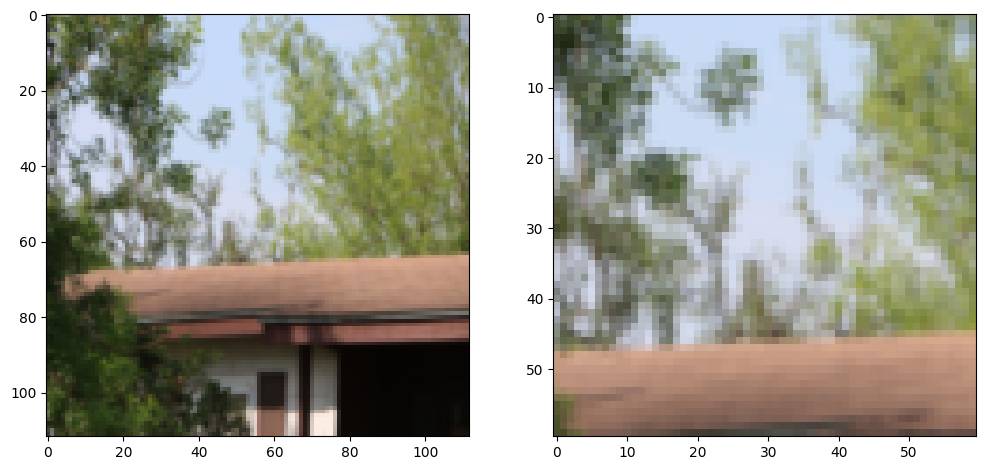

In [28]:
image_resized_crop = image_resized[20:80,20:80]

fig,ax = plt.subplots(1,2,figsize=(12,6))
ax[0].imshow(image_resized)
ax[1].imshow(image_resized_crop);

### Rotate and Translate 

You can also do a Euclidean Tranformation.  In the demo below we apply a translation and translation+rotation tranformation.

<EuclideanTransform(matrix=
    [[ 1., -0., 20.],
     [ 0.,  1., 20.],
     [ 0.,  0.,  1.]])>


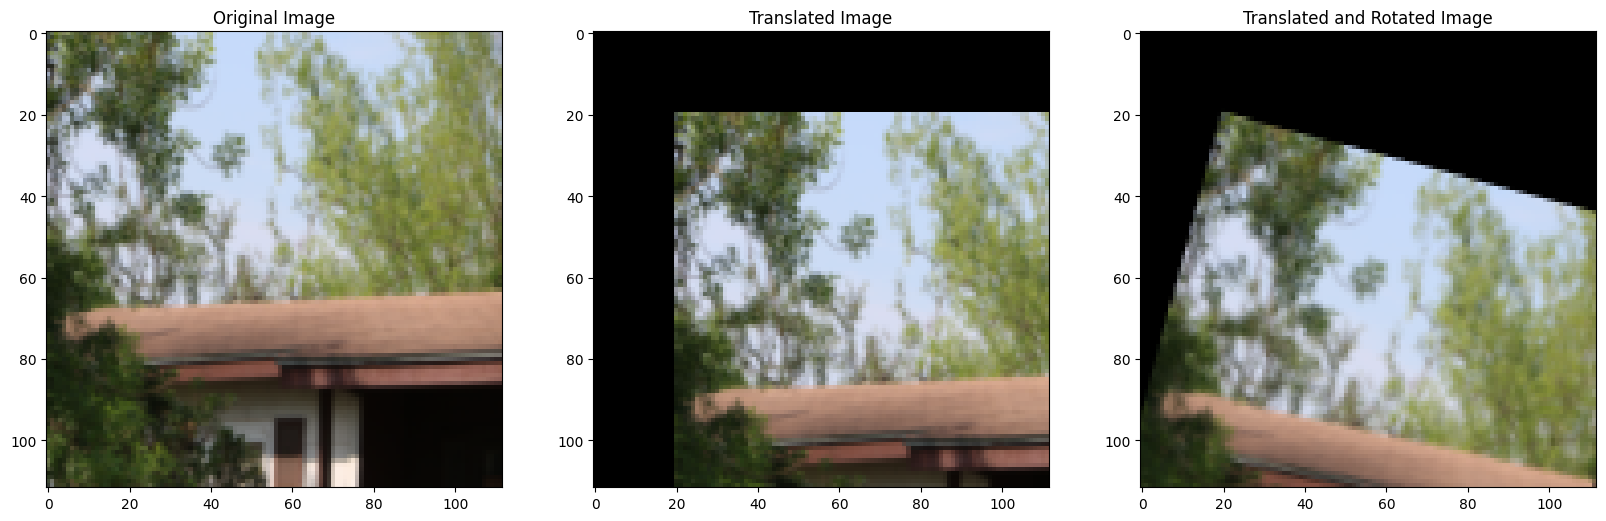

In [29]:
from skimage import data
from skimage import transform
from skimage import img_as_float

# this function creates a tranformation matrix
tform1 = transform.EuclideanTransform(
   rotation=0,             # 0 degree rotation
   translation = (20, 20)  # translate image by 20 pixels in x and y directions
   )

tform2 = transform.EuclideanTransform(
   rotation=np.pi / 12.,
   translation = (20, 20)
   )

print(tform1)

# apply tranformation
img = img_as_float(image_resized)
tf_img1 = transform.warp(img, tform1.inverse)
tf_img2 = transform.warp(img, tform2.inverse)

#plot tranformation
fig,ax = plt.subplots(1,3,figsize=(20,6))
ax[0].imshow(image_resized)
ax[1].imshow(tf_img1)
ax[2].imshow(tf_img2)
ax[0].set_title('Original Image')
ax[1].set_title('Translated Image')
ax[2].set_title('Translated and Rotated Image');

### Edge Detection

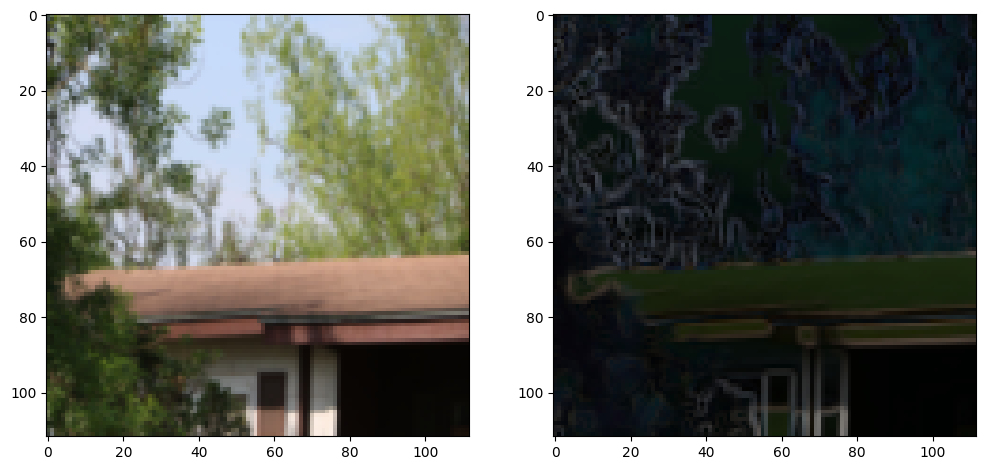

In [30]:
from skimage import filters

sobel_image_resized = filters.sobel(image_resized)

fig,ax=plt.subplots(1,2,figsize=(12,6))
ax[0].imshow(image_resized)
ax[1].imshow(sobel_image_resized);